In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [2]:
data=pd.read_csv('titanic.csv',index_col=0)

In [15]:
df=pd.DataFrame(data)

In [17]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# check null value

df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [23]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
df.shape

(891, 11)

In [25]:
df1=df.dropna() #df1 has no null value

In [20]:
df1.shape

(183, 11)

In [22]:
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


## outliers identifing the outliers

An **outlier** is an object that deviates significantly from the rest of the objects. They can be caused by measurement or execution error. The analysis of outlier data is referred to as outlier analysis or outlier mining.

**Why outlier analysis**
Most data mining methods discard outliers noise or exceptions, however, in some applications such as fraud detection, the rare events can be more interesting than the more regularly occurring one and hence, the outlier analysis becomes important in such case.

<AxesSubplot:xlabel='Age'>

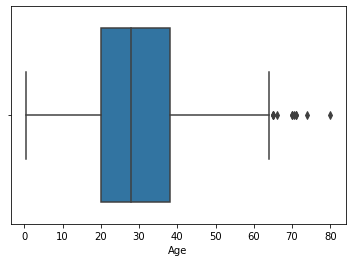

In [27]:
sns.boxplot(x='Age',data=df)  #with null value

<AxesSubplot:xlabel='Age'>

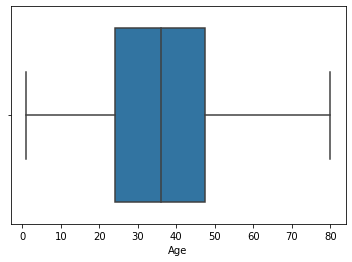

In [28]:
sns.boxplot(x='Age',data=df1)

In [30]:
Q1= df.quantile(0.25)
Q3 =df.quantile(0.75)

IQR = Q3 -Q1
print(IQR)

Survived     1.0000
Pclass       1.0000
Age         17.8750
SibSp        1.0000
Parch        0.0000
Fare        23.0896
dtype: float64


In [39]:
print(df<(Q1-1.5 * IQR))or (df>(Q3 + 1.5*IQR))

               Age  Cabin  Embarked   Fare   Name  Parch  Pclass    Sex  \
PassengerId                                                               
1            False  False     False  False  False  False   False  False   
2            False  False     False  False  False  False   False  False   
3            False  False     False  False  False  False   False  False   
4            False  False     False  False  False  False   False  False   
5            False  False     False  False  False  False   False  False   
...            ...    ...       ...    ...    ...    ...     ...    ...   
887          False  False     False  False  False  False   False  False   
888          False  False     False  False  False  False   False  False   
889          False  False     False  False  False  False   False  False   
890          False  False     False  False  False  False   False  False   
891          False  False     False  False  False  False   False  False   

             SibSp  Surv

C:\Users\deep9\AppData\Local\Temp/ipykernel_12040/3386661972.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(df<(Q1-1.5 * IQR))or (df>(Q3 + 1.5*IQR))
C:\Users\deep9\AppData\Local\Temp/ipykernel_12040/3386661972.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(df<(Q1-1.5 * IQR))or (df>(Q3 + 1.5*IQR))


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,True,False,False,False,False,False


In [40]:
# true value are outliers

In [43]:
print(df['Age'].quantile(0.5))
print(df['Age'].quantile(0.95))
print(df['Age'].quantile(0.75))

28.0
56.0
38.0


In [45]:
import numpy as np
df['Age']=np.where(data['Age']>54.0,35.0,df['Age'])

In [46]:
df['Age'].describe()

count    714.000000
mean      28.110882
std       12.116815
min        0.420000
25%       20.125000
50%       28.000000
75%       35.000000
max       54.000000
Name: Age, dtype: float64

In [47]:
# now their is on one above age 54

<AxesSubplot:xlabel='Age'>

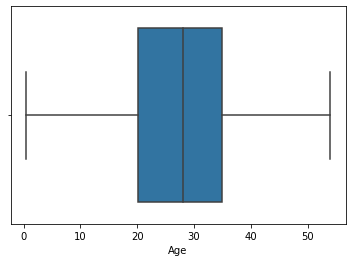

In [49]:
sns.boxplot(x='Age',data=df)

In [50]:
# all the outliers are gone now

<AxesSubplot:xlabel='Fare'>

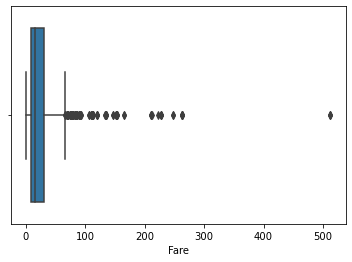

In [53]:
sns.boxplot(x='Fare',data=df)

In [54]:
# trying removing outliers for fare

In [56]:
print(df['Fare'].quantile(0.5))
print(df['Fare'].quantile(0.95))
print(df['Fare'].quantile(0.75))

14.4542
112.07915
31.0
